## DataFrames

- In Python werden DataFrames nur über Zusatzpackages wie [Pandas](https://pandas.pydata.org/pandas-docs/stable/) - unterstützt. 
- Pandas ist eines der umfangreichsten Python Pakete.
- Beim Webscraping ist Pandas besonders für explorative Qualitätskontrollen der Daten und das abspeichern in gängigen Formaten nützlich.

In [2]:
import pandas as pd # import als 'pd' Kürzel für weniger Schreibarbeit

Diktionäre innerhalb von Listen können in Pandas über eine einzige Zeile Code in einen Datensatz transformiert werden, wobei die Keys als Spaltenbezeichnungen interpretiert werden. Als Beispiel lesen wir die verarbeiteten Daten aus der Grundlagenchallenge ein:

In [1]:
%cd "D:\datascraping\data"

[WinError 3] Das System kann den angegebenen Pfad nicht finden: 'D:\\datascraping\\data'
C:\Users\ekara\Documents\GitHub\python_data_scraping\notebooks


In [3]:
import json
with open('guardian_corona_parsed.json', 'r', encoding = 'utf-8') as f:
    guardian = json.load(f)
guardian[0].keys()

dict_keys(['id', 'section', 'url', 'title', 'text', 'chars', 'month', 'tags'])

In [5]:
guardian

[{'id': 'world/2020/may/08/coronavirus-the-week-explained',
  'section': 'world',
  'url': 'https://www.theguardian.com/world/2020/may/08/coronavirus-the-week-explained',
  'title': 'Coronavirus: the week explained',
  'text': 'Welcome to our weekly roundup of developments in the coronavirus pandemic, which continues to pose new political, scientific and personal challenges around the world. As the UK is among several countries moving towards the lifting of some restrictions, it remains under pressure to deliver enough tests – and the role of scientific advisers has come under renewed scrutiny. Public trust in science grows during the pandemic, as top scientist quits Sage It’s been a rocky week for science advisers. The prominent disease modelling expert Prof Neil Ferguson stepped down from the UK government’s advisory committee, Sage, after admitting that he had breached lockdown restrictions, and former chief scientific adviser, David King, issued a warning that potential political i

In [4]:
df = pd.DataFrame(guardian)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10801 entries, 0 to 10800
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       10801 non-null  object
 1   section  10801 non-null  object
 2   url      10801 non-null  object
 3   title    10801 non-null  object
 4   text     10801 non-null  object
 5   chars    10801 non-null  int64 
 6   month    10801 non-null  int64 
 7   tags     10801 non-null  object
dtypes: int64(2), object(6)
memory usage: 675.2+ KB


In [8]:
df.head(3)


id section  \
0   world/2020/may/08/coronavirus-the-week-explained   world   
1   world/2020/apr/14/coronavirus-latest-at-a-glance   world   
2  world/2020/apr/17/coronavirus-contact-tracing-...   world   

                                                 url  \
0  https://www.theguardian.com/world/2020/may/08/...   
1  https://www.theguardian.com/world/2020/apr/14/...   
2  https://www.theguardian.com/world/2020/apr/17/...   

                                    title  \
0         Coronavirus: the week explained   
1                Coronavirus: at a glance   
2  Coronavirus: contact tracing explained   

                                                text  chars  month  \
0  Welcome to our weekly roundup of developments ...   6139      5   
1  Key developments in the global coronavirus out...   2196      4   
2  What is contact tracing? This is one of the mo...   2469      4   

                                                tags  
0  world/coronavirus-outbreak, science/science, w...  
1            world/world, world/coronavirus-outbreak  
2  world/coronavirus-outbreak, science/infectious...

Ein paar gängige Pandas Befehle:

In [9]:
df['chars'].describe() # Mittelwert

count     10801.000000
mean       7292.959819
std       14457.010226
min           0.000000
25%        3326.000000
50%        4538.000000
75%        6014.000000
max      205535.000000
Name: chars, dtype: float64

In [12]:
df.month.value_counts()[:5] # Häufigkeitsauszählung

4    4307
3    4076
5    1479
2     744
1     195
Name: month, dtype: int64

In [14]:
months = [2, 3] # februar und maerz
df[df.month.isin(months)].section.value_counts()[:5] # bedingte Häufigkeit
len(df[df.month.isin(months)])

4820

In [15]:
df.sort_values('month').head(3) # Sortierung über eine oder mehrere Variablen

id   section  \
1565  us-news/2020/jan/30/us-briefing-coronavirus-th...   us-news   
2930  business/2020/jan/28/global-firms-halt-china-t...  business   
9181  us-news/2020/jan/27/us-briefing-remembering-ko...   us-news   

                                                    url  \
1565  https://www.theguardian.com/us-news/2020/jan/3...   
2930  https://www.theguardian.com/business/2020/jan/...   
9181  https://www.theguardian.com/us-news/2020/jan/2...   

                                                  title  \
1565  US briefing: coronavirus threat, Palestinian p...   
2930  Global firms halt China travel as coronavirus ...   
9181  US briefing: remembering Kobe Bryant, Grammys ...   

                                                   text  chars  month  \
1565  Good morning, I’m Tim Walker with today’s esse...   7184      1   
2930  Businesses are stopping staff travel to China ...   2869      1   
9181  Good morning, I’m Tim Walker with today’s esse...   6605      1   

                                                   tags  
1565                       us-news/us-news, world/world  
2930  business/chinese-economy, world/hong-kong, wor...  
9181                                    us-news/us-news

In [16]:
df.text = df.text.str.lower() # String Funktionen
df.text.head()

0    welcome to our weekly roundup of developments ...
1    key developments in the global coronavirus out...
2    what is contact tracing? this is one of the mo...
3    key developments in the global coronavirus out...
4    key developments in the global coronavirus out...
Name: text, dtype: object

Über die Pandas [IO Tools](https://pandas.pydata.org/pandas-docs/stable/io.html) können Datensätze in eine Vielzahl von Formaten exportiert werden:

In [18]:
df.to_excel('guardian_corona.xlsx', 
            encoding = 'utf-8', # Enkodierung
            index = False) # Index Spalte entfernen

# achtung: excel hat einschraenkungen wie z.b. maximale stringlaengen

In [ ]:
df.to_csv('guardian_corona.csv', 
            encoding = 'utf-8',
            index = False)

Und wieder eingelesen werden:

In [ ]:
df = pd.read_csv('guardian_corona.csv',
                encoding = 'utf-8')
df.head(3)

## API Basics

Wie API's funktionieren:

-  API steht für [Application Programming Interface](https://de.wikipedia.org/wiki/Programmierschnittstelle) (Programmierschnittstelle)
- Eine Vielzahl von Organisationen bieten API's an um Daten und Dienste verfügbar zu machen (Google, Facebook, Wikipedia, …)
- über API's können **strukturierte** Daten abgegriffen werden (oder gepostet werden, je nach Provider) 

- Für uns haben API's zwei entscheidende Vorteile:
    - Der Zugang ist legal und meist klar definiert (z.B. 10.000 Aufrufe pro Tag)
    - Wir müssen keine Scraping Techniken für **unstrukturierte Daten** (z.B. Webseiten) anwenden
    - Für einige API's gibt es Python Packages, die den Datenzugang vereinfachen
- Nachteile: 
     - Wir müssen lernen, wie die API funktioniert (einige Dokumentationen sind sehr gut, andere weniger)
     - Einige APIs verlangen Authentifizierung und / oder sind nicht kostenlos verfügbar

### API Zugriff über Pandas Datareader

Der Pandas Datareader ist eine Zusatzbibliothek, die zunächst installiert werden muss. Über das [magic command](http://ipython.readthedocs.io/en/stable/interactive/magics.html) `!` kann direkt die Shell (Eingabeaufforderung) des Betriebsystems angesprochen werden:

In [19]:
!pip install pandas-datareader --upgrade

- In der [Dokumentation des Pandas Data Readers](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#world-bank) ist z.B. beschrieben, wie man Daten aus der [World Bank API](http://data.worldbank.org/) abgreifen kann.
- Darüber hinaus können auch Daten von Quandl, OECD, MOEX, Eurostat und anderen Quellen abgegriffen werden.


In [20]:
from pandas_datareader import wb # importiert world bank zugang
search = wb.search('GDP.*current.*US') # suche nach keywords, ergebnis als data frame
search.head(10)

id                                               name unit  \
10224  NV.SRV.DISC.CD      Discrepancy in GDP, value added (current US$)        
10352  NY.GDP.DISC.CD  Discrepancy in expenditure estimate of GDP (cu...        
10363  NY.GDP.MKTP.CD                                  GDP (current US$)        
10382  NY.GDP.PCAP.CD                       GDP per capita (current US$)        
10489   NYGDPMKTPSACD               GDP,current US$,millions,seas. adj.,        

                              source  \
10224  Africa Development Indicators   
10352  Africa Development Indicators   
10363   World Development Indicators   
10382   World Development Indicators   
10489        Global Economic Monitor   

                                              sourceNote  \
10224  This is the discrepancy included in the value ...   
10352  This is the discrepancy included in the ‘total...   
10363  GDP at purchaser's prices is the sum of gross ...   
10382  GDP per capita is gross domestic product divid...   
10489                                                      

                                      sourceOrganization            topics  
10224  b'World Bank national accounts data, and OECD ...                    
10352  b'World Bank national accounts data, and OECD ...                    
10363  b'World Bank national accounts data, and OECD ...  Economy & Growth  
10382  b'World Bank national accounts data, and OECD ...  Economy & Growth  
10489                                                b''

Wenn der gesuchte Indikator gefunden wurde, kann der entsprechende Datensatz über die API gezogen werden:

In [56]:
df = wb.download(indicator = 'NY.GDP.PCAP.CD')
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9 entries, ('Canada', '2005') to ('United States', '2003')
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NY.GDP.PCAP.CD  9 non-null      float64
dtypes: float64(1)
memory usage: 463.0+ bytes


In [57]:
df.head(6) # Multi-index Datensatz, GDP in Trillionen USD

NY.GDP.PCAP.CD
country year                
Canada  2005    36382.507916
        2004    32143.681408
        2003    28300.463096
Mexico  2005     8277.671564
        2004     7484.486399
        2003     7075.369643

In [58]:
df

NY.GDP.PCAP.CD
country       year                
Canada        2005    36382.507916
              2004    32143.681408
              2003    28300.463096
Mexico        2005     8277.671564
              2004     7484.486399
              2003     7075.369643
United States 2005    44114.747781
              2004    41712.801068
              2003    39496.485875

### Datenverarbeitung

Deskriptiva über gruppierten Datensatz:

In [59]:
df.groupby('country').describe()

NY.GDP.PCAP.CD                                           \
                       count          mean          std           min   
country                                                                 
Canada                   3.0  32275.550807  4042.635808  28300.463096   
Mexico                   3.0   7612.509202   611.289502   7075.369643   
United States            3.0  41774.678241  2309.752659  39496.485875   

                                                                       
                        25%           50%           75%           max  
country                                                                
Canada         30222.072252  32143.681408  34263.094662  36382.507916  
Mexico          7279.928021   7484.486399   7881.078981   8277.671564  
United States  40604.643471  41712.801068  42913.774424  44114.747781

Datenstruktur verändern:

In [60]:
df2 = df.reset_index() # indizes als variablen
df2.head()

country  year  NY.GDP.PCAP.CD
0  Canada  2005    36382.507916
1  Canada  2004    32143.681408
2  Canada  2003    28300.463096
3  Mexico  2005     8277.671564
4  Mexico  2004     7484.486399

In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         9 non-null      object 
 1   year            9 non-null      object 
 2   NY.GDP.PCAP.CD  9 non-null      float64
dtypes: float64(1), object(2)
memory usage: 344.0+ bytes


In [62]:
df2.columns = ['country', 'year', 'gdp'] # spalten umbenennen
df2.year = df2.year.astype(int) # numerischer jahresindikator
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  9 non-null      object 
 1   year     9 non-null      int32  
 2   gdp      9 non-null      float64
dtypes: float64(1), int32(1), object(1)
memory usage: 308.0+ bytes


### Datenvisualisierung

Um Grafiken innerhalb von Notebooks darzustellen muss zunächst einmalig der Befehl `%matplotlib inline` ausgeführt werden. Das Grafik Package [seaborn](https://seaborn.pydata.org/) kann anschließend für einfache Plots importiert werden. Die wichtigsten Funktionen des Pakets werden in [Online Tutorials](https://seaborn.pydata.org/tutorial.html) erklärt.

Seaborn falls notwendig innerhalb eines Notebooks installieren bzw. upgraden:

In [27]:
!pip install seaborn --upgrade

  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


In [28]:
%matplotlib inline
import seaborn as sns
sns.set(style = 'whitegrid') # visualisierungsstil anpassen

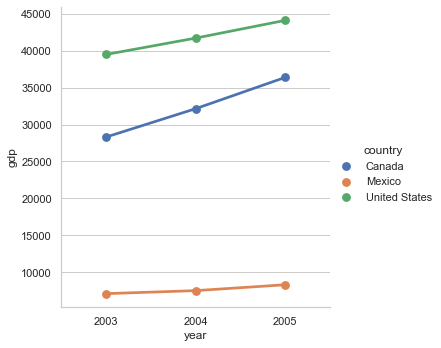

In [63]:
sns.catplot(x = 'year', y = 'gdp', hue = 'country', 
            data = df2, height = 5, kind = 'point');

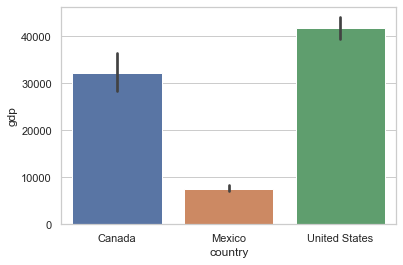

In [64]:
sns.barplot(x = 'country', y = 'gdp', data = df2);

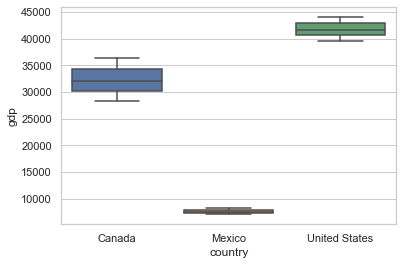

In [65]:
sns.boxplot(x = 'country', y  = 'gdp', data = df2);

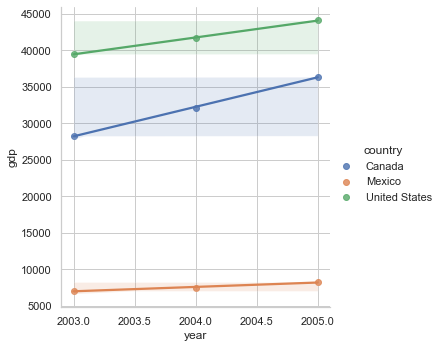

In [66]:
sns.lmplot(x = 'year', y = 'gdp', hue = 'country', data = df2);

### Übungsaufgabe 1

Sucht euch aus der Worldbank API ein Merkmal, das euch interessiert und zieht die Daten aus der API in einen DataFrame. Verwendet anschließend Deskriptiva und/oder einfache Plots, um die Daten zu betrachten. Speichert den Datensatz anschließend in einem Format eurer Wahl, z.B. `csv`, ab. 

*Hinweis: Nützlich für die Aufgabe könnten die Dokumentationen für die Plotting Funktionalität von [Seaborn](https://seaborn.pydata.org/tutorial.html) und [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html).*

In [43]:
# Code Übungsaufgabe 1
from pandas_datareader import wb # importiert world bank zugang
search2 = wb.search('poverty.*DE')
search2.info()
search2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 739 to 13167
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  18 non-null     object
 1   name                18 non-null     object
 2   unit                18 non-null     object
 3   source              18 non-null     object
 4   sourceNote          18 non-null     object
 5   sourceOrganization  18 non-null     object
 6   topics              18 non-null     object
dtypes: object(7)
memory usage: 1.1+ KB


id                                               name  \
739             8.0.LIPI                         Labor Income Poverty Index   
7202      HF.UHC.NOPX.ZS  Proportion of population pushed by out-of-pock...   
7203   HF.UHC.NOPX.ZS.Q1  Proportion of population pushed by out-of-pock...   
7204   HF.UHC.NOPX.ZS.Q2  Proportion of population pushed by out-of-pock...   
7205   HF.UHC.NOPX.ZS.Q3  Proportion of population pushed by out-of-pock...   
7206   HF.UHC.NOPX.ZS.Q4  Proportion of population pushed by out-of-pock...   
7207   HF.UHC.NOPX.ZS.Q5  Proportion of population pushed by out-of-pock...   
13103     SI.POV.ATTM.MI  Multidimensional poverty, Educational attainme...   
13117     SI.POV.DDAY.MI  Multidimensional poverty, Monetary poverty (% ...   
13123     SI.POV.ELEC.MI  Multidimensional poverty, Electricity (% of po...   
13124     SI.POV.ENRL.MI  Multidimensional poverty, Educational enrollme...   
13140  SI.POV.MDIM.17.XQ  Multidimensional poverty index, children (popu...   
13143     SI.POV.MDIM.IT  Multidimensional poverty intensity (average sh...   
13145     SI.POV.MDIM.XQ         Multidimensional poverty index (scale 0-1)   
13152        SI.POV.NGAP                                Poverty Gap (index)   
13155        SI.POV.NSEV                           Poverty Severity (index)   
13158     SI.POV.SANI.MI  Multidimensional poverty, Sanitation (% of pop...   
13167     SI.POV.WATR.MI  Multidimensional poverty, Drinking water (% of...   

      unit                                             source  \
739                                            LAC Equity Lab   
7202        Health Equity and Financial Protection Indicators   
7203        Health Equity and Financial Protection Indicators   
7204        Health Equity and Financial Protection Indicators   
7205        Health Equity and Financial Protection Indicators   
7206        Health Equity and Financial Protection Indicators   
7207        Health Equity and Financial Protection Indicators   
13103                                      Poverty and Equity   
13117                                      Poverty and Equity   
13123                                      Poverty and Equity   
13124                                      Poverty and Equity   
13140                            World Development Indicators   
13143                            World Development Indicators   
13145                            World Development Indicators   
13152       Indonesia Database for Policy and Economic Res...   
13155       Indonesia Database for Policy and Economic Res...   
13158                                      Poverty and Equity   
13167                                      Poverty and Equity   

                                              sourceNote  \
739    The Labor Income Poverty Index (LIPI)  measure...   
7202                                                       
7203                                                       
7204                                                       
7205                                                       
7206                                                       
7207                                                       
13103  Multidimensional poverty, educational attainme...   
13117  Multidimensional poverty, Monetary poverty (% ...   
13123  Multidimensional poverty, electricity (% of po...   
13124  Multidimensional poverty, educational enrollme...   
13140  Proportion of the child population that is mul...   
13143  The average percentage of dimensions in which ...   
13145  Proportion of the population that is multidime...   
13152  Poverty Gap index: Average gap between expendi...   
13155                                                      
13158  Multidimensional poverty, sanitation (% of pop...   
13167  Multidimensional poverty, drinking water (% of...   

                                      sourceOrganization    topics  
739    b'LAC Equity Lab tabulations of LABLAC (CEDLAS...  Poverty   
7202 

In [52]:
df3 = wb.download(indicator = 'SI.POV.ATTM.MI', country=('US', 'EG'))
df3.info()
df3

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6 entries, ('Egypt, Arab Rep.', '2005') to ('United States', '2003')
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SI.POV.ATTM.MI  0 non-null      float64
dtypes: float64(1)
memory usage: 425.0+ bytes


SI.POV.ATTM.MI
country          year                
Egypt, Arab Rep. 2005             NaN
                 2004             NaN
                 2003             NaN
United States    2005             NaN
                 2004             NaN
                 2003             NaN

### Die Guardian API

- Die [Guardian API](http://open-platform.theguardian.com/explore/) ermöglicht es Metadaten und Volltext zu Artikeln aus der britischen Tageszeitung strukturiert (`JSON`) zu erfassen. 
- Die API hat verschiedene Endpoints (siehe Dokumentation), wobei wir uns hauptsächlich für `/content` interessieren.

In [ ]:
%cd "D:\datascraping"

In [69]:
with open('guardian-api.txt', 'r') as f:
    # encoding ist hier nicht relevant
    api_key = f.read()
print(api_key)

9c7a302e-5b09-4604-aae0-f174ab2d51f0


Für die Kommunikation brauchen wir:
- die korrekte Basis URL
- ein entsprechend den API Vorgaben definiertes Set an Parametern, die bestimmen, was zurückgegeben wird.

In [70]:
base = 'http://content.guardianapis.com/search'
params = {'api-key': api_key, # API Authorisierung über Key
         'q':'islamophobia'} # Suchanfrage

Das Python Package [requests](http://docs.python-requests.org/en/master/) verarbeitet Base URL und Parameter (+ optional Header) automatisch zu einer validen [HTTP](https://de.wikipedia.org/wiki/Hypertext_Transfer_Protocol) Anfrage.

In [71]:
import requests
print(base)
print(params)
r = requests.get(base, params = params)
data = r.json()

http://content.guardianapis.com/search
{'api-key': '9c7a302e-5b09-4604-aae0-f174ab2d51f0', 'q': 'islamophobia'}


In [83]:
type(data)
#data['response'].keys()
data['response']['pages']

278

In [84]:
len(data['response']['results'])

10

Der Python Code konvertiert zu einer URL:

In [85]:
r.url

'http://content.guardianapis.com/search?api-key=9c7a302e-5b09-4604-aae0-f174ab2d51f0&q=islamophobia'

[Status Code](https://de.wikipedia.org/wiki/HTTP-Statuscode) der HTTP Anfrage:

In [86]:
r.status_code

200

String Version der API Response:

In [87]:
r.text[:200]

'{"response":{"status":"ok","userTier":"developer","total":2774,"startIndex":1,"pageSize":10,"currentPage":1,"pages":278,"orderBy":"relevance","results":[{"id":"uk-news/2021/jul/06/labour-lifts-trevor-'

JSON Version (Diktionär) der API Response:

In [88]:
data = r.json()
data['response'].keys()

dict_keys(['status', 'userTier', 'total', 'startIndex', 'pageSize', 'currentPage', 'pages', 'orderBy', 'results'])

In [89]:
from pprint import pprint
pprint(data['response']['results'][0])

{'apiUrl': 'https://content.guardianapis.com/uk-news/2021/jul/06/labour-lifts-trevor-phillips-suspension-for-alleged-islamophobia',
 'id': 'uk-news/2021/jul/06/labour-lifts-trevor-phillips-suspension-for-alleged-islamophobia',
 'isHosted': False,
 'pillarId': 'pillar/news',
 'pillarName': 'News',
 'sectionId': 'uk-news',
 'sectionName': 'UK news',
 'type': 'article',
 'webPublicationDate': '2021-07-06T05:00:18Z',
 'webTitle': 'Labour lifts Trevor Phillips’ suspension for alleged '
             'Islamophobia',
 'webUrl': 'https://www.theguardian.com/uk-news/2021/jul/06/labour-lifts-trevor-phillips-suspension-for-alleged-islamophobia'}


### Übungsaufgabe 2

- Wie viele Artikel wurden über die obige Anfrage ausgegeben?
- Macht euch mit der [Online Dokumentation](https://open-platform.theguardian.com/documentation/) der API vertraut.
    - Findet einen Weg, mehr Artikel pro Anfrage abzurufen
    - Findet einen Weg, Artikel Volltexte abzurufen
    - Schreibt eine Funktion, in der die API angesteuert wird. Input der Funktion soll ein Suchstring (Parameter `q`) sein. Der Output soll eine Liste mit Diktionären zu den zugehörigen Artikeln (inklusive Volltexte) beinhalten. 

In [ ]:
# Code Übungsaufgabe 2

### Pagination

- Bei vielen API's ist es trotz einer Erhöhung der maximalen Rückgabe an Dokumenten bei größeren Datenmengen nicht möglich, alle Treffer auf einmal abzurufen.
- Stattdessen werden die Treffer über Pagination indexiert. Wir müssen demnach einen Weg finden, alle Pages programmatisch aufzurufen.

In [90]:
r = requests.get(base, params = params)
data = r.json()
data['response'].keys()

dict_keys(['status', 'userTier', 'total', 'startIndex', 'pageSize', 'currentPage', 'pages', 'orderBy', 'results'])

In [91]:
nr_pages =  data['response']['pages']
size = data['response']['pageSize'] 
page =  data['response']['currentPage']

# Python String Formatting
'Die letzte Anfrage lieferte insgesamt {} Artikel auf Seite {}, \
wobei insgesamt {} Pages verfügbar sind.'.format(size, page, nr_pages)

'Die letzte Anfrage lieferte insgesamt 10 Artikel auf Seite 1, wobei insgesamt 278 Pages verfügbar sind.'

Eine Möglichkeit um für die TheGuardian API alle Pages aufzurufen:

In [92]:
import time # Paket um für Zeitintervalle und Datumsangaben

In [93]:
def get_guardian(query, 
                 hits = 200, # Wert von 200 wenn kein Input übergeben wird
                 max_hits = 1000): # maximale Anzahl an Artikeln
    base = 'http://content.guardianapis.com/search'
    params = {'api-key': api_key, 'q': query, 'show-fields': 'all',
              'page': 1, # beginn auf seite 1
              'page-size': hits # artikel pro seite
            
             }
    
    articles = []
    r = requests.get(base, params = params)
    resp = r.json()['response']
    pages = resp['pages']
    # anzahl der pages feststellen
    data = resp['results']
    print('Total matches: ' + str(resp['total']))
    print('Current page: '+ str(resp['currentPage']))
    articles += data
    # daten aus aktueller anfrage in liste schieben
    
    for p in range(2, pages + 1):
        print(p)
        # über alle pages iterieren
        time.sleep(1)
        # nach jeder anfrage eine sekunde warten
        params['page'] = p
        # page parameter updaten
        r = requests.get(base, params = params)
        resp = r.json()['response']
        print('Current page: '+ str(resp['currentPage']))
        data = resp['results']
        articles += data
        if len(articles) >= max_hits: # abbruchkriterium
            break
        # daten aus aktueller anfrage in liste schieben
    return articles 

In [95]:
articles = get_guardian('trump', max_hits = 500)

Total matches: 60178
Current page: 1
2
Current page: 2
3
Current page: 3


In [96]:
pprint(articles[0])

{'apiUrl': 'https://content.guardianapis.com/environment/2021/oct/08/biden-bears-ears-national-monument-grand-staircase-escalante',
 'fields': {'body': '<p>Joe Biden restored environmental protections on Friday '
                    'to three national monuments and their vast expanse of '
                    'vital ecosystems and sacred Indigenous spaces, reversing '
                    'cuts made by Donald Trump.</p> <p>“These protections '
                    'provide a bridge to our past, but they also build a '
                    'bridge to a safer and more sustainable future,” said '
                    'Biden. “One where we strengthen our economy and pass on a '
                    'healthy planet to our children and our '
                    'grandchildren.”</p> <aside class="element '
                    'element-rich-link element--thumbnail"> <p> <span>Related: '
                    '</span><a '
                    'href="https://www.theguardian.com/environment/2021/sep/29/ca

## Die Twitter API

- Für die [Twitter API](https://developer.twitter.com/en/docs) gibt es bereits spezielle Python Packages, sodass wir nicht "manuell" requests erstellen müssen. 
- Ein sehr gutes Package ist `python-twitter`:
http://python-twitter.readthedocs.io/en/latest/getting_started.html
- Um das Paket zu nutzen muss es zunächst installiert werden.

In [97]:
!pip install python-twitter --upgrade

Für den Zugang zur Twitter API werden mehrere Keys benötigt, welche erst nach der Erstellung einer Twitter App verfügbar sind (Anleitung siehe [hier](https://github.com/cschwem2er/python_data_scraping/raw/master/setup/twitter_api_access.pdf)).

In [ ]:
%cd "D:\datascraping"

Nach erfolgreicher Erstellung einer App empfiehlt es sich, die zugehörigen Twitter Credentials (consumer key etc.) in einer Textdatei abzulegen. Anschließend können diese wieder eingelesen werden:

In [99]:
with open('twitter-api.txt', 'r') as f:
    keys = f.read().split() # split ueber zeilenumbrueche

keys[0][:10] # 10 Zeichen des consumer keys

'O7rls2ip5R'

Wir speichern die Authentifizierung im Objekt `api`. Der Zusatzparameter `tweet_mode = 'extended'` ermöglicht es, die vollen Texte von Tweets abzugreifen, die länger als 140 Zeichen sind (siehe [hier](https://developer.twitter.com/en/docs/tweets/tweet-updates)).

In [100]:
import twitter # nicht import python-twitter!
api = twitter.Api(consumer_key = keys[0] ,
                  consumer_secret = keys[1],
                  access_token_key = keys[2],
                  access_token_secret = keys[3],
                  tweet_mode = 'extended', # tweets mit > 140 zeichen abgreifen
                  sleep_on_rate_limit = True) # bei rate limit abwarten

Suchanfrage nach Begriffen oder Hashtags (auf Tweets aus den [vergangenen sieben Tagen](https://developer.twitter.com/en/docs/tweets/search/overview/standard.html) beschränkt):

In [101]:
got = api.GetSearch('@eakarahan', # suchbegriff
                       count = 100) # maximale trefferanzahl

Tweets werden als spezielle Objekte gespeichert, bei denen einzelnen Attribute über Methodenaufrufe ausgelesen werden.

In [104]:
example_tweet = got[0]
type(example_tweet)

twitter.models.Status

In [105]:
example_tweet

Status(ID=1455821100567384064, ScreenName=RainerSchDO, Created=Wed Nov 03 08:56:12 +0000 2021, Text='RT @EaKarahan: Und die Verrohungsspirale wird bewusst eine ganze Runde weitergedreht. Und beide sind auch noch Rechtsanwälte...\nBei Antiras…')

In [106]:
print('id:', example_tweet.id)
print('Text:', example_tweet.full_text) # key 'text' wenn tweet_mode != 'extended'
print('Hashtags:', example_tweet.hashtags)
print('Media:', example_tweet.media)
print('Date:', example_tweet.created_at)
print('Language:', example_tweet.lang)
print('Retweets:', example_tweet.retweet_count)

id: 1455821100567384064
Text: RT @EaKarahan: Und die Verrohungsspirale wird bewusst eine ganze Runde weitergedreht. Und beide sind auch noch Rechtsanwälte...
Bei Antiras…
Hashtags: []
Media: None
Date: Wed Nov 03 08:56:12 +0000 2021
Language: de
Retweets: 1


Alternativ können Tweet Objekte in ein konventionelles Python Diktionär überführt werden:

In [107]:
example_tweet.AsDict()

{'created_at': 'Wed Nov 03 08:56:12 +0000 2021',
 'full_text': 'RT @EaKarahan: Und die Verrohungsspirale wird bewusst eine ganze Runde weitergedreht. Und beide sind auch noch Rechtsanwälte...\nBei Antiras…',
 'hashtags': [],
 'id': 1455821100567384064,
 'id_str': '1455821100567384064',
 'lang': 'de',
 'retweet_count': 1,
 'retweeted_status': {'created_at': 'Wed Nov 03 08:49:40 +0000 2021',
  'favorite_count': 3,
  'full_text': 'Und die Verrohungsspirale wird bewusst eine ganze Runde weitergedreht. Und beide sind auch noch Rechtsanwälte...\nBei Antirassismus-Protesten: Gouverneur begnadigt Ehepaar, das mit Waffen auf Demonstranten zielte https://t.co/wtiAd6sEbq via @faznet',
  'hashtags': [],
  'id': 1455819455360012294,
  'id_str': '1455819455360012294',
  'lang': 'de',
  'retweet_count': 1,
  'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
  'urls': [{'expanded_url': 'https://www.faz.net/-gq5-aefhp?GEPC=s3',
    'url': 'https://t.co/wtiAd6sEbq'}],


### Übungsaufgabe 3

Macht euch mit der Twitter API und der Dokumentation des python-twitter Packages vertraut. Findet heraus wie man:
   
   - gezielt einzelne Tweets abgreift (z.B: [Audi Tweet](https://twitter.com/Audi/status/1260266468869996544))
   - mehrere Tweets eines bestimmten Nutzers (z.B. [Jan Böhmermann](https://twitter.com/janboehm)) abgreift 
   - Die Twitter Daten in einen Pandas Datensatz überführt

In [ ]:
# Code Übungsaufgabe 3

<br>
<br>


___

                
**Kontakt: Carsten Schwemmer** (Webseite: www.carstenschwemmer.com,  Email: c.schwem2er@gmail.com)